In [1]:
from tqdm.notebook import trange, tqdm
import os

import numpy as np
import pandas as pd
import swifter

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

os.chdir("..")
from src.utils import BETA_STR
from src.config import Ns, betas

In [2]:
df = pd.read_csv("data/convert_ib_to_decay.csv")

In [3]:
# reformat dataframe
df["N"] = Ns
df = df.rename_axis(columns="beta_ind")
df = df.melt(id_vars="N", var_name="beta_ind", value_name="decay_params")
df["halflife"] = df["decay_params"].apply(lambda t: eval(t)[0])
df["lambda"] = df["decay_params"].apply(lambda t: eval(t)[1])
df = df.drop("decay_params", axis=1)
df[["N", "beta_ind", "halflife"]] = df[["N", "beta_ind", "halflife"]].astype(np.int32)
df["lambda"] = df["lambda"].astype(float)

In [4]:
n_h_map = df.groupby("N")["halflife"].median()

<AxesSubplot:xlabel='N'>

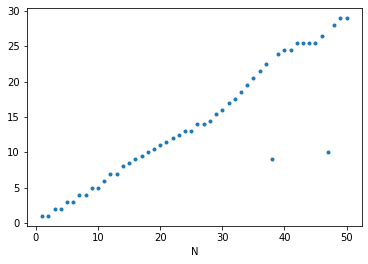

In [5]:
n_h_map.plot(style=".")

In [6]:
# interpolate outliers
n_h_map.loc[n_h_map.values/n_h_map.index.values < 0.25] = np.nan
n_h_map = n_h_map.interpolate().astype(int)

<AxesSubplot:xlabel='N'>

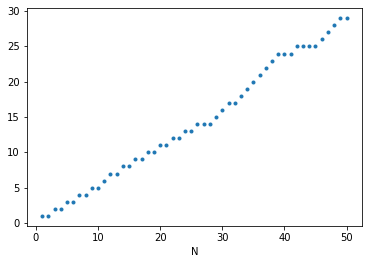

In [7]:
n_h_map.plot(style=".")

In [13]:
n_h_map.to_json("data/N_halflife_map.json")

In [18]:
ret = pd.read_json("data/N_halflife_map.json", typ="series")

In [24]:
ret.loc[22].item()

int

In [11]:
import json

In [12]:
json.loads(a)

{'1': 1,
 '2': 1,
 '3': 2,
 '4': 2,
 '5': 3,
 '6': 3,
 '7': 4,
 '8': 4,
 '9': 5,
 '10': 5,
 '11': 6,
 '12': 7,
 '13': 7,
 '14': 8,
 '15': 8,
 '16': 9,
 '17': 9,
 '18': 10,
 '19': 10,
 '20': 11,
 '21': 11,
 '22': 12,
 '23': 12,
 '24': 13,
 '25': 13,
 '26': 14,
 '27': 14,
 '28': 14,
 '29': 15,
 '30': 16,
 '31': 17,
 '32': 17,
 '33': 18,
 '34': 19,
 '35': 20,
 '36': 21,
 '37': 22,
 '38': 23,
 '39': 24,
 '40': 24,
 '41': 24,
 '42': 25,
 '43': 25,
 '44': 25,
 '45': 25,
 '46': 26,
 '47': 27,
 '48': 28,
 '49': 29,
 '50': 29}

In [10]:
a

'{"1":1,"2":1,"3":2,"4":2,"5":3,"6":3,"7":4,"8":4,"9":5,"10":5,"11":6,"12":7,"13":7,"14":8,"15":8,"16":9,"17":9,"18":10,"19":10,"20":11,"21":11,"22":12,"23":12,"24":13,"25":13,"26":14,"27":14,"28":14,"29":15,"30":16,"31":17,"32":17,"33":18,"34":19,"35":20,"36":21,"37":22,"38":23,"39":24,"40":24,"41":24,"42":25,"43":25,"44":25,"45":25,"46":26,"47":27,"48":28,"49":29,"50":29}'

In [25]:
df = pd.read_csv("data/ib_to_decay/noise=0.0.csv")

In [ ]:
df = df.rename_axis(index="N", columns="beta_ind")

In [34]:
df = df.reset_index().melt(id_vars="N",var_name="beta_ind", value_name="lambda")

In [44]:
df["beta_ind"]=df["beta_ind"].astype(int)

In [ ]:
df

In [46]:
means = df.groupby("beta_ind")["lambda"].mean()
sems = df.groupby("beta_ind")["lambda"].sem()

<AxesSubplot:xlabel='beta_ind', ylabel='lambda'>

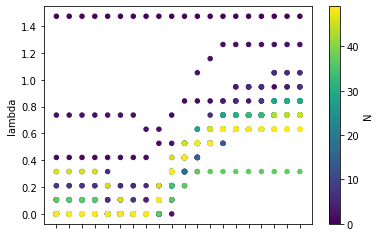

In [41]:
df.plot(kind="scatter", x="beta_ind", y="lambda", c="N", cmap="viridis")